In [1]:
import fsrs_optimizer

timezone = "Europe/Moscow"
next_day_starts_at = 5
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./Main_27.04.2023.apkg", filter_out_suspended_cards, filter_out_flags
)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False
)
optimizer.define_model()
optimizer.pretrain(verbose=False)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/30507 [00:00<?, ?it/s]

Trainset saved.
Pretrain finished!


[]

In [2]:
from torch import Tensor, nn
import torch
from statsmodels.nonparametric.smoothers_lowess import lowess


class ICILoss(nn.Module):
    def __init__(self):
        super(ICILoss, self).__init__()
        # self.loss_fn = nn.L1Loss(reduce="None")
        self.loss_fn = nn.MSELoss(reduce="None")

    def forward(self, predictions: Tensor, labels: Tensor) -> Tensor:
        observation = lowess(
            labels.detach().numpy(),
            predictions.detach().numpy(),
            it=0,
            delta=0.01
            * (max(predictions.detach().numpy()) - min(predictions.detach().numpy())),
            return_sorted=False,
        )
        observation = torch.as_tensor(observation, dtype=torch.float32)
        # return self.loss_fn(predictions, observation)
        return torch.sqrt(self.loss_fn(predictions, observation))

  0%|          | 0/248083 [00:00<?, ?it/s]

dataset built


train:   0%|          | 0/1756144 [00:00<?, ?it/s]

iteration: 175295
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1047, 1.1303, 0.8244, 0.044, 1.6279, 0.1372, 1.0034, 2.1312, 0.0849, 0.3194, 1.3545, 0.2177, 2.7849]
iteration: 349757
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1045, 1.1297, 0.8258, 0.0418, 1.6276, 0.139, 1.0031, 2.1309, 0.0854, 0.319, 1.3548, 0.2169, 2.7861]
iteration: 525052
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1046, 1.1294, 0.8269, 0.0397, 1.627, 0.1407, 1.0025, 2.1304, 0.0862, 0.3183, 1.3548, 0.2161, 2.7869]
iteration: 699514
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1042, 1.1288, 0.8275, 0.0385, 1.6269, 0.1418, 1.0025, 2.1305, 0.0862, 0.3183, 1.3554, 0.2158, 2.7875]
iteration: 874809
w: [0.3474, 0.3474, 1.592, 90.5314, 5.104, 1.1282, 0.8279, 0.0374, 1.6268, 0.1427, 1.0024, 2.1305, 0.0864, 0.3182, 1.3558, 0.2155, 2.7881]
iteration: 1049271
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1037, 1.1278, 0.8281, 0.0366, 1.6268, 0.1433, 1.0024, 2.1305, 0.0865, 0.3181, 1.356, 0.2153, 2.7886]
iteration: 1223733
w: [0.3474, 0.3474, 1.592, 90.5314, 5.

train:   0%|          | 0/1755200 [00:00<?, ?it/s]

iteration: 175236
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1041, 1.1293, 0.8234, 0.0445, 1.6284, 0.1368, 1.0039, 2.1322, 0.0839, 0.3204, 1.3558, 0.2179, 2.7844]
iteration: 349580
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1038, 1.1283, 0.8238, 0.0429, 1.628, 0.1384, 1.0036, 2.1328, 0.0836, 0.3207, 1.357, 0.2171, 2.7846]
iteration: 524816
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1036, 1.1275, 0.824, 0.0414, 1.6274, 0.14, 1.0031, 2.1332, 0.0834, 0.321, 1.3581, 0.2162, 2.7846]
iteration: 699160
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1031, 1.1265, 0.8241, 0.0404, 1.6273, 0.1411, 1.003, 2.1337, 0.0831, 0.3213, 1.3591, 0.2157, 2.7846]
iteration: 874396
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1027, 1.1257, 0.824, 0.0396, 1.6273, 0.1418, 1.003, 2.1342, 0.0828, 0.3217, 1.36, 0.2154, 2.7847]
iteration: 1048740
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1025, 1.1252, 0.824, 0.0389, 1.6271, 0.1425, 1.0029, 2.1344, 0.0826, 0.3219, 1.3605, 0.2151, 2.7848]
iteration: 1223084
w: [0.3474, 0.3474, 1.592, 90.5314, 5.1023, 

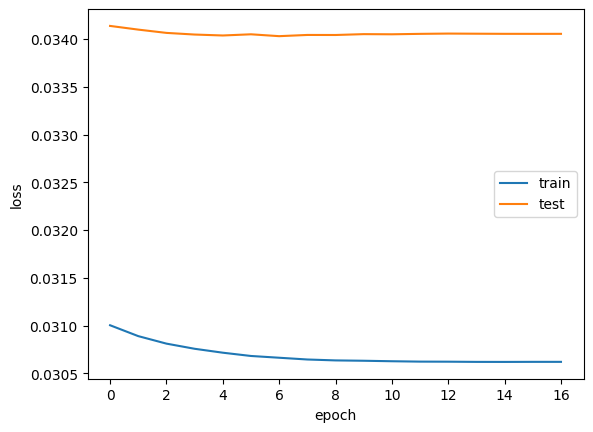

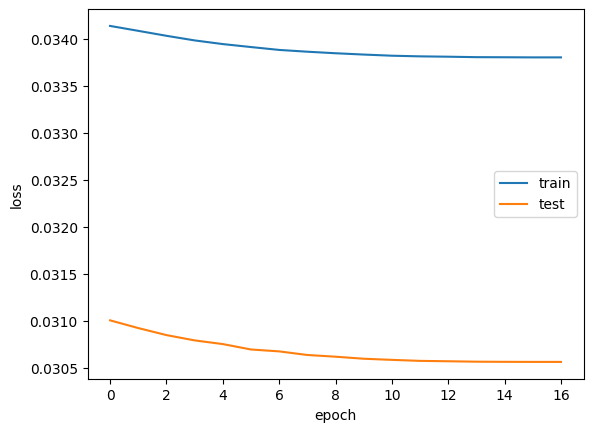

In [3]:
from fsrs_optimizer import Trainer, lineToTensor, StratifiedGroupKFold
import numpy as np

lr: float = 1e-4
n_epoch: int = 16
n_splits: int = 2
batch_size: int = 4096
verbose: bool = True

dataset = optimizer.dataset
dataset["tensor"] = dataset.progress_apply(
    lambda x: lineToTensor(list(zip([x["t_history"]], [x["r_history"]]))[0]),
    axis=1,
)
dataset["group"] = dataset["r_history"] + dataset["t_history"]

w = []
plots = []
sgkf = StratifiedGroupKFold(n_splits=n_splits)
for train_index, test_index in sgkf.split(dataset, dataset["i"], dataset["group"]):
    train_set = dataset.iloc[train_index].copy()
    test_set = dataset.iloc[test_index].copy()
    trainer = Trainer(
        train_set,
        test_set,
        optimizer.init_w,
        n_epoch=n_epoch,
        lr=lr,
        batch_size=batch_size,
    )
    trainer.loss_fn = ICILoss()
    w.append(trainer.train(verbose=verbose))
    if verbose:
        plots.append(trainer.plot())

w = np.array(w)
avg_w = np.round(np.mean(w, axis=0), 4)
optimizer.w = avg_w.tolist()

Loss before training: 0.4219
Loss after training: 0.4213
R-squared: 0.8556
RMSE: 0.0335
MAE: 0.0264
ICI: 0.0251
E50: 0.0197
E90: 0.0421
EMax: 0.2854
[0.18848656 0.76311156]

Last rating: 1
R-squared: 0.4375
RMSE: 0.0652
MAE: 0.0598
ICI: 0.0588
E50: 0.0670
E90: 0.0858
EMax: 0.1936
[0.22829869 0.67487864]

Last rating: 2
R-squared: 0.7301
RMSE: 0.0464
MAE: 0.0419
ICI: 0.0399
E50: 0.0395
E90: 0.0456
EMax: 0.2964
[0.14698561 0.78731824]

Last rating: 3
R-squared: 0.8708
RMSE: 0.0309
MAE: 0.0185
ICI: 0.0174
E50: 0.0101
E90: 0.0340
EMax: 0.2708
[0.20861617 0.7589295 ]

Last rating: 4
R-squared: -2.5873
RMSE: 0.0595
MAE: 0.0357
ICI: 0.0351
E50: 0.0248
E90: 0.0767
EMax: 0.3816
[0.63380914 0.36097131]


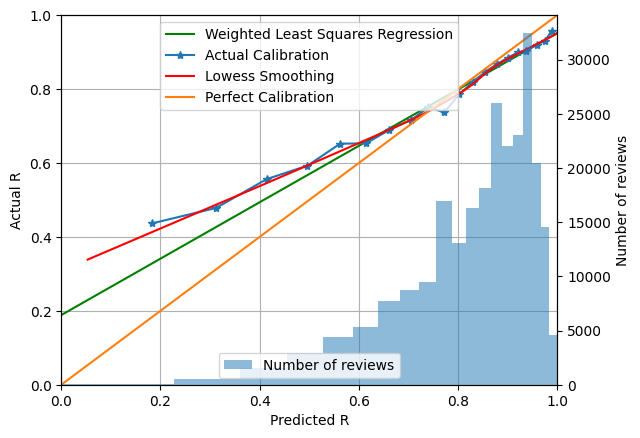

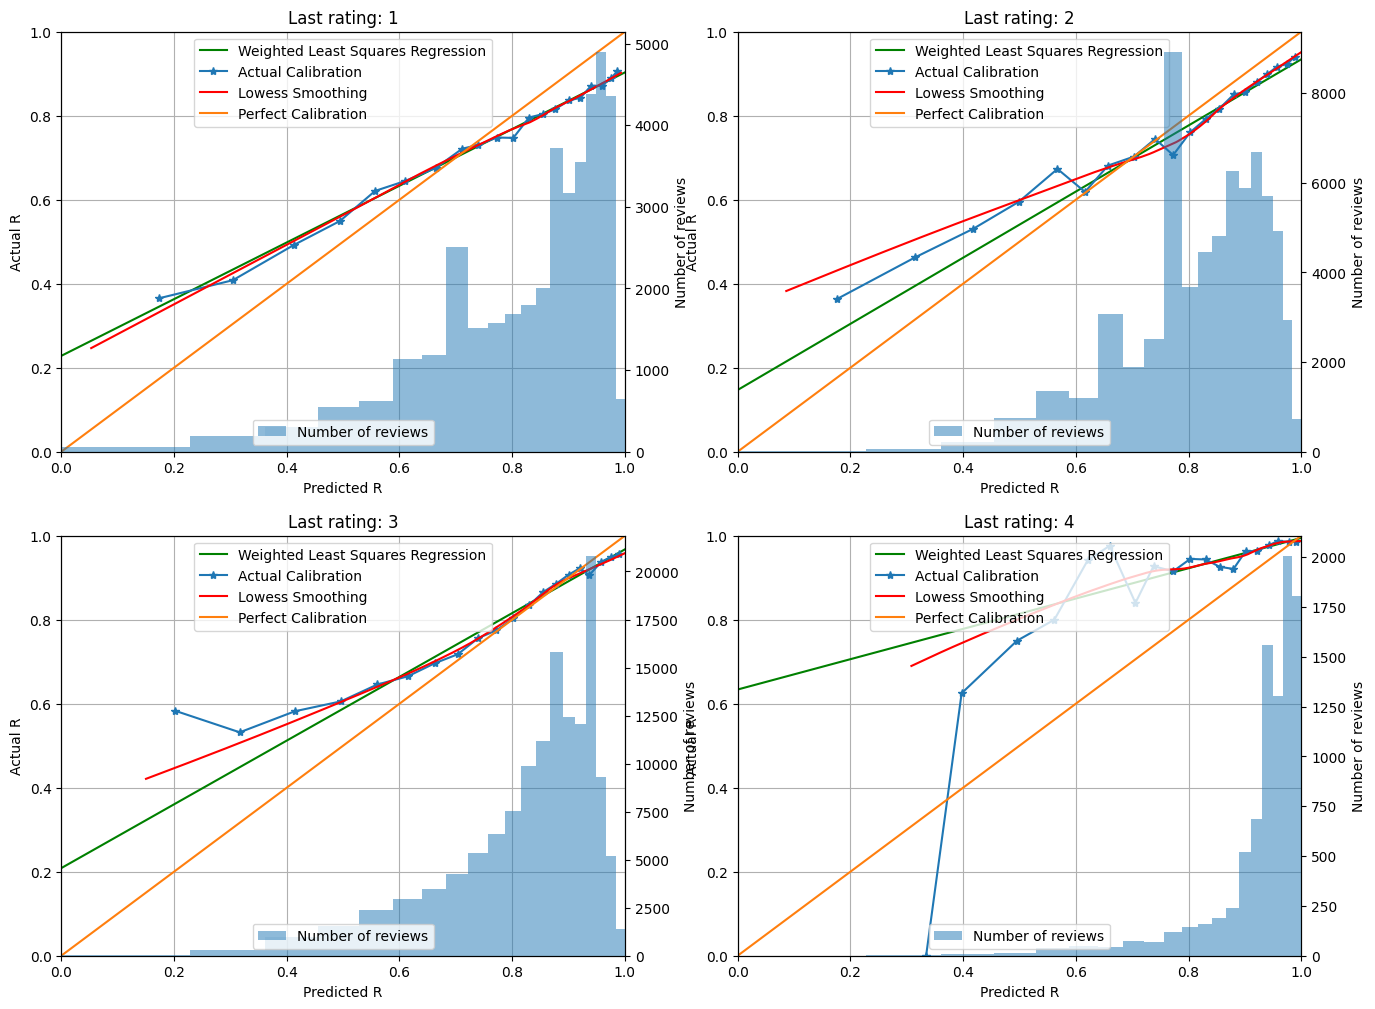

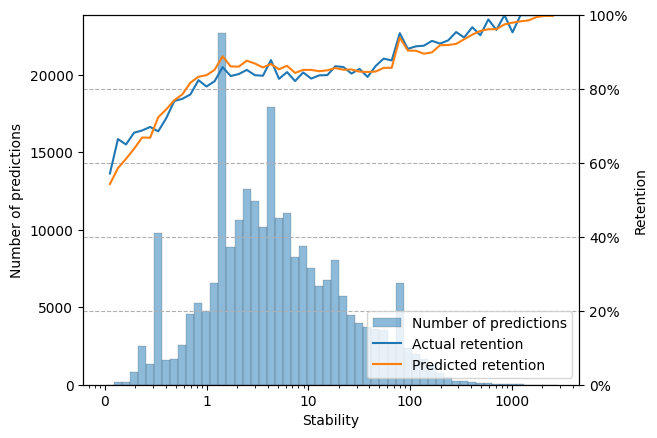

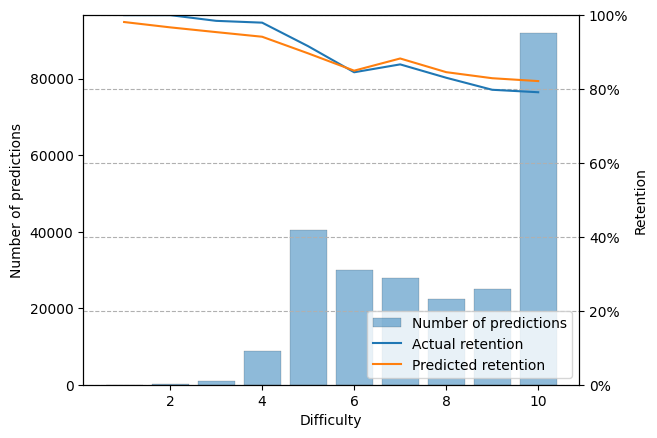

In [4]:
loss_before, loss_after = optimizer.evaluate()
print(f"Loss before training: {loss_before:.4f}")
print(f"Loss after training: {loss_after:.4f}")
metrics, figures = optimizer.calibration_graph()

dataset built


train:   0%|          | 0/916255 [00:00<?, ?it/s]

iteration: 91648
w: [0.3474, 0.3474, 1.592, 90.5314, 4.5798, 1.7891, 1.12, 0.0037, 1.6937, 0.124, 1.1146, 2.2757, 0.0415, 0.25, 1.6449, 0.2001, 4.0]
iteration: 183296
w: [0.3474, 0.3474, 1.592, 90.5314, 4.046, 1.4976, 0.9586, 0.0, 1.6856, 0.1, 1.1121, 2.3283, 0.1011, 0.2496, 1.4877, 0.1472, 4.0]
iteration: 274899
w: [0.3474, 0.3474, 1.592, 90.5314, 3.8341, 1.6293, 1.2584, 0.0091, 1.6318, 0.1, 1.0626, 2.3685, 0.1207, 0.2326, 1.5832, 0.1795, 4.0]
iteration: 366547
w: [0.3474, 0.3474, 1.592, 90.5314, 3.7202, 1.8137, 1.3835, 0.0414, 1.6733, 0.1541, 1.1432, 2.4394, 0.1392, 0.2524, 1.5493, 0.2454, 4.0]
iteration: 458150
w: [0.3474, 0.3474, 1.592, 90.5314, 3.5839, 1.9095, 1.2736, 0.0, 1.6234, 0.2063, 1.1017, 2.5131, 0.1157, 0.2178, 1.4896, 0.2275, 4.0]
iteration: 549798
w: [0.3474, 0.3474, 1.592, 90.5314, 3.5048, 1.9287, 1.427, 0.0017, 1.62, 0.1606, 1.0996, 2.5782, 0.0842, 0.2278, 1.4994, 0.1844, 4.0]
iteration: 641401
w: [0.3474, 0.3474, 1.592, 90.5314, 3.4175, 1.8638, 1.4672, 0.0, 1.6374, 0

train:   0%|          | 0/900635 [00:00<?, ?it/s]

iteration: 90112
w: [0.3474, 0.3474, 1.592, 90.5314, 4.4162, 1.2321, 0.9113, 0.0089, 1.6764, 0.1459, 1.0643, 2.1603, 0.1533, 0.2224, 1.2463, 0.1627, 4.0]
iteration: 180224
w: [0.3474, 0.3474, 1.592, 90.5314, 3.9786, 1.6552, 1.3272, 0.0046, 1.6782, 0.171, 1.1046, 2.2706, 0.1539, 0.3149, 1.4175, 0.0883, 3.9691]
iteration: 270239
w: [0.3474, 0.3474, 1.592, 90.5314, 3.5576, 1.5748, 1.1682, 0.0, 1.6352, 0.1675, 1.0521, 2.3731, 0.0524, 0.2612, 1.4068, 0.1917, 4.0]
iteration: 360351
w: [0.3474, 0.3474, 1.592, 90.5314, 3.4563, 1.7871, 1.3778, 0.0041, 1.6004, 0.2025, 1.0447, 2.3967, 0.1162, 0.2352, 1.2972, 0.1876, 4.0]
iteration: 450366
w: [0.3474, 0.3474, 1.592, 90.5314, 3.2728, 1.8339, 1.4923, 0.0, 1.6754, 0.1377, 1.1433, 2.4249, 0.1171, 0.2405, 1.3284, 0.1555, 4.0]
iteration: 540478
w: [0.3474, 0.3474, 1.592, 90.5314, 3.2406, 1.8879, 1.5271, 0.0, 1.6015, 0.1368, 1.0724, 2.4729, 0.1155, 0.2309, 1.3788, 0.1592, 3.9983]
iteration: 630493
w: [0.3474, 0.3474, 1.592, 90.5314, 3.0806, 1.8089, 1.484

train:   0%|          | 0/857705 [00:00<?, ?it/s]

iteration: 86016
w: [0.3474, 0.3474, 1.592, 90.5314, 4.2502, 0.8373, 0.8527, 0.0, 1.6125, 0.2263, 1.0562, 2.1799, 0.1263, 0.263, 1.5029, 0.1464, 4.0]
iteration: 172032
w: [0.3474, 0.3474, 1.592, 90.5314, 4.1336, 1.4888, 1.1328, 0.0, 1.6251, 0.2158, 1.1031, 2.2553, 0.1481, 0.2562, 1.3848, 0.1585, 4.0]
iteration: 257557
w: [0.3474, 0.3474, 1.592, 90.5314, 3.7035, 1.6328, 1.0202, 0.0, 1.5405, 0.112, 1.0501, 2.3425, 0.1833, 0.2388, 1.2619, 0.2794, 4.0]
iteration: 343573
w: [0.3474, 0.3474, 1.592, 90.5314, 3.6037, 1.4488, 1.2273, 0.0059, 1.5596, 0.1, 1.1057, 2.411, 0.151, 0.2423, 1.4475, 0.1585, 4.0]
iteration: 429098
w: [0.3474, 0.3474, 1.592, 90.5314, 3.4468, 1.6118, 1.0978, 0.001, 1.5324, 0.1192, 1.092, 2.4738, 0.0803, 0.2239, 1.3595, 0.1692, 4.0]
iteration: 515114
w: [0.3474, 0.3474, 1.592, 90.5314, 3.4053, 1.4457, 1.1262, 0.0034, 1.5185, 0.154, 1.093, 2.4835, 0.1209, 0.2175, 1.3611, 0.1927, 4.0]
iteration: 600639
w: [0.3474, 0.3474, 1.592, 90.5314, 3.415, 1.4495, 1.1295, 0.0049, 1.4993

train:   0%|          | 0/867975 [00:00<?, ?it/s]

iteration: 87040
w: [0.3474, 0.3474, 1.592, 90.5314, 4.6495, 1.1824, 1.0201, 0.0, 1.6382, 0.1297, 1.065, 2.1846, 0.14, 0.2623, 1.4384, 0.1948, 4.0]
iteration: 174080
w: [0.3474, 0.3474, 1.592, 90.5314, 4.0266, 1.4191, 1.1468, 0.0, 1.7366, 0.1043, 1.1689, 2.2959, 0.1064, 0.2021, 1.3931, 0.1717, 4.0]
iteration: 260635
w: [0.3474, 0.3474, 1.592, 90.5314, 3.7069, 1.3593, 1.1416, 0.0, 1.5742, 0.1164, 1.0568, 2.3436, 0.1094, 0.2371, 1.4267, 0.2179, 4.0]
iteration: 347675
w: [0.3474, 0.3474, 1.592, 90.5314, 3.7505, 1.9327, 1.4126, 0.0262, 1.6186, 0.239, 1.12, 2.4217, 0.0699, 0.2087, 1.3166, 0.1868, 3.9283]
iteration: 434230
w: [0.3474, 0.3474, 1.592, 90.5314, 3.4404, 1.8439, 1.3102, 0.0, 1.5579, 0.208, 1.0689, 2.426, 0.1305, 0.2402, 1.3311, 0.1784, 3.9897]
iteration: 521270
w: [0.3474, 0.3474, 1.592, 90.5314, 3.2178, 1.7237, 1.0498, 0.0, 1.6248, 0.1327, 1.1434, 2.4721, 0.0962, 0.2092, 1.3213, 0.1952, 4.0]
iteration: 607825
w: [0.3474, 0.3474, 1.592, 90.5314, 3.2785, 1.793, 1.1985, 0.0055, 1.5

train:   0%|          | 0/846610 [00:00<?, ?it/s]

iteration: 84480
w: [0.3474, 0.3474, 1.592, 90.5314, 4.5086, 1.3048, 0.9723, 0.0, 1.6504, 0.1, 1.0485, 2.169, 0.0899, 0.2439, 1.5312, 0.1827, 4.0]
iteration: 168960
w: [0.3474, 0.3474, 1.592, 90.5314, 3.951, 1.2025, 1.0893, 0.0, 1.7403, 0.1, 1.143, 2.22, 0.1629, 0.2189, 1.4757, 0.2416, 4.0]
iteration: 253290
w: [0.3474, 0.3474, 1.592, 90.5314, 3.8078, 1.7389, 1.3244, 0.0, 1.6851, 0.1422, 1.1091, 2.4092, 0.0783, 0.2764, 1.5432, 0.2471, 4.0]
iteration: 337770
w: [0.3474, 0.3474, 1.592, 90.5314, 3.2268, 1.2603, 1.1803, 0.0238, 1.6832, 0.1, 1.0997, 2.3828, 0.1672, 0.2464, 1.4462, 0.2055, 4.0]
iteration: 422100
w: [0.3474, 0.3474, 1.592, 90.5314, 3.1467, 1.4804, 1.0971, 0.0003, 1.5919, 0.1841, 1.0337, 2.4665, 0.1255, 0.2384, 1.3067, 0.1785, 4.0]
iteration: 506580
w: [0.3474, 0.3474, 1.592, 90.5314, 3.0865, 1.5086, 1.1876, 0.0, 1.5719, 0.1409, 1.0182, 2.5221, 0.0864, 0.2203, 1.4157, 0.1521, 4.0]
iteration: 590910
w: [0.3474, 0.3474, 1.592, 90.5314, 3.0154, 1.5009, 1.2481, 0.0091, 1.5936, 0.1

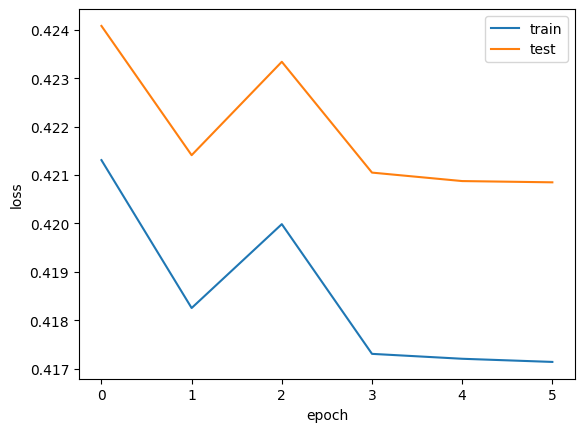

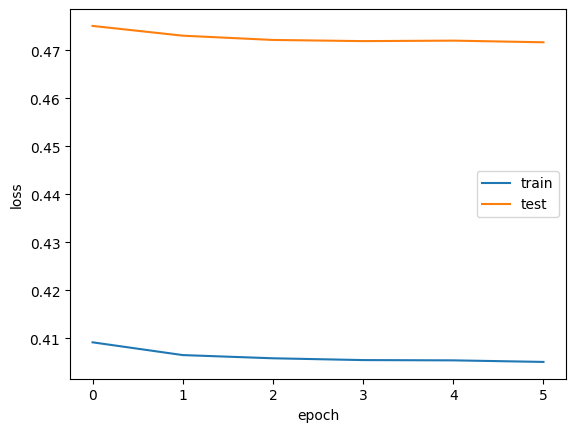

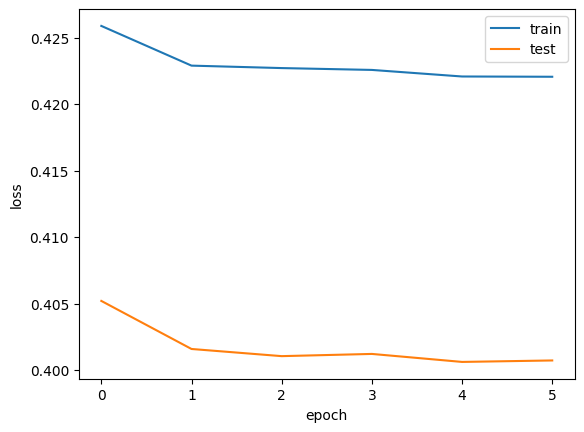

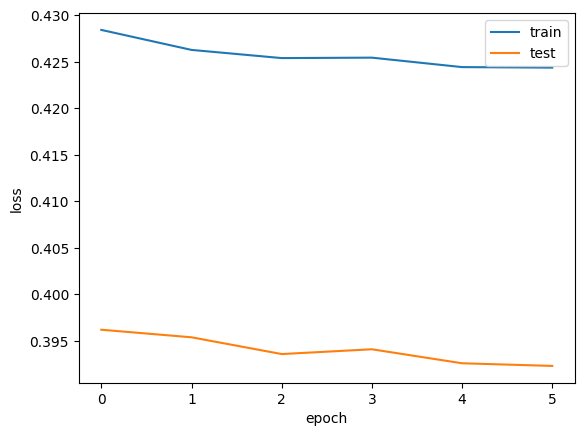

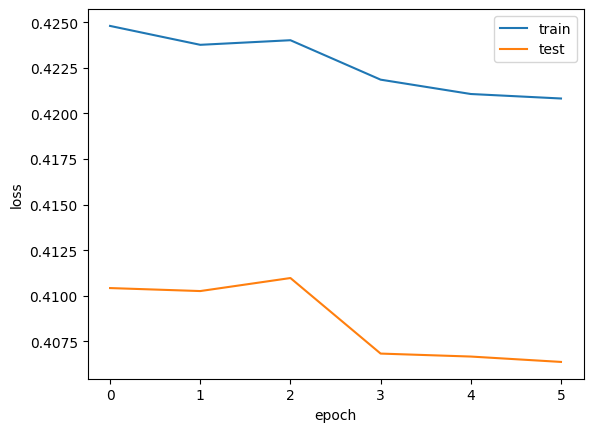

In [5]:
lr: float = 4e-2
n_epoch: int = 5
n_splits: int = 5
batch_size: int = 512
verbose: bool = True


w = []
plots = []
sgkf = StratifiedGroupKFold(n_splits=n_splits)
for train_index, test_index in sgkf.split(dataset, dataset["i"], dataset["group"]):
    train_set = dataset.iloc[train_index].copy()
    test_set = dataset.iloc[test_index].copy()
    trainer = Trainer(
        train_set,
        test_set,
        optimizer.init_w,
        n_epoch=n_epoch,
        lr=lr,
        batch_size=batch_size,
    )
    w.append(trainer.train(verbose=verbose))
    if verbose:
        plots.append(trainer.plot())

w = np.array(w)
avg_w = np.round(np.mean(w, axis=0), 4)
optimizer.w = avg_w.tolist()

Loss before training: 0.4219
Loss after training: 0.4179
R-squared: 0.7916
RMSE: 0.0419
MAE: 0.0284
ICI: 0.0272
E50: 0.0208
E90: 0.0546
EMax: 0.3341
[0.25176045 0.69979334]

Last rating: 1
R-squared: 0.5541
RMSE: 0.0587
MAE: 0.0518
ICI: 0.0507
E50: 0.0510
E90: 0.0779
EMax: 0.2328
[0.30188562 0.61242023]

Last rating: 2
R-squared: 0.7352
RMSE: 0.0464
MAE: 0.0394
ICI: 0.0349
E50: 0.0304
E90: 0.0448
EMax: 0.3301
[0.22385892 0.71000584]

Last rating: 3
R-squared: 0.7515
RMSE: 0.0444
MAE: 0.0256
ICI: 0.0244
E50: 0.0126
E90: 0.0619
EMax: 0.3199
[0.27680741 0.68494931]

Last rating: 4
R-squared: -0.1499
RMSE: 0.0370
MAE: 0.0208
ICI: 0.0201
E50: 0.0115
E90: 0.0412
EMax: 0.1750
[0.46623843 0.53115158]


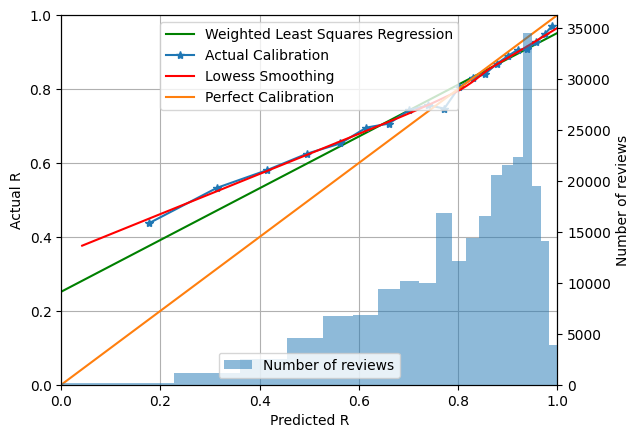

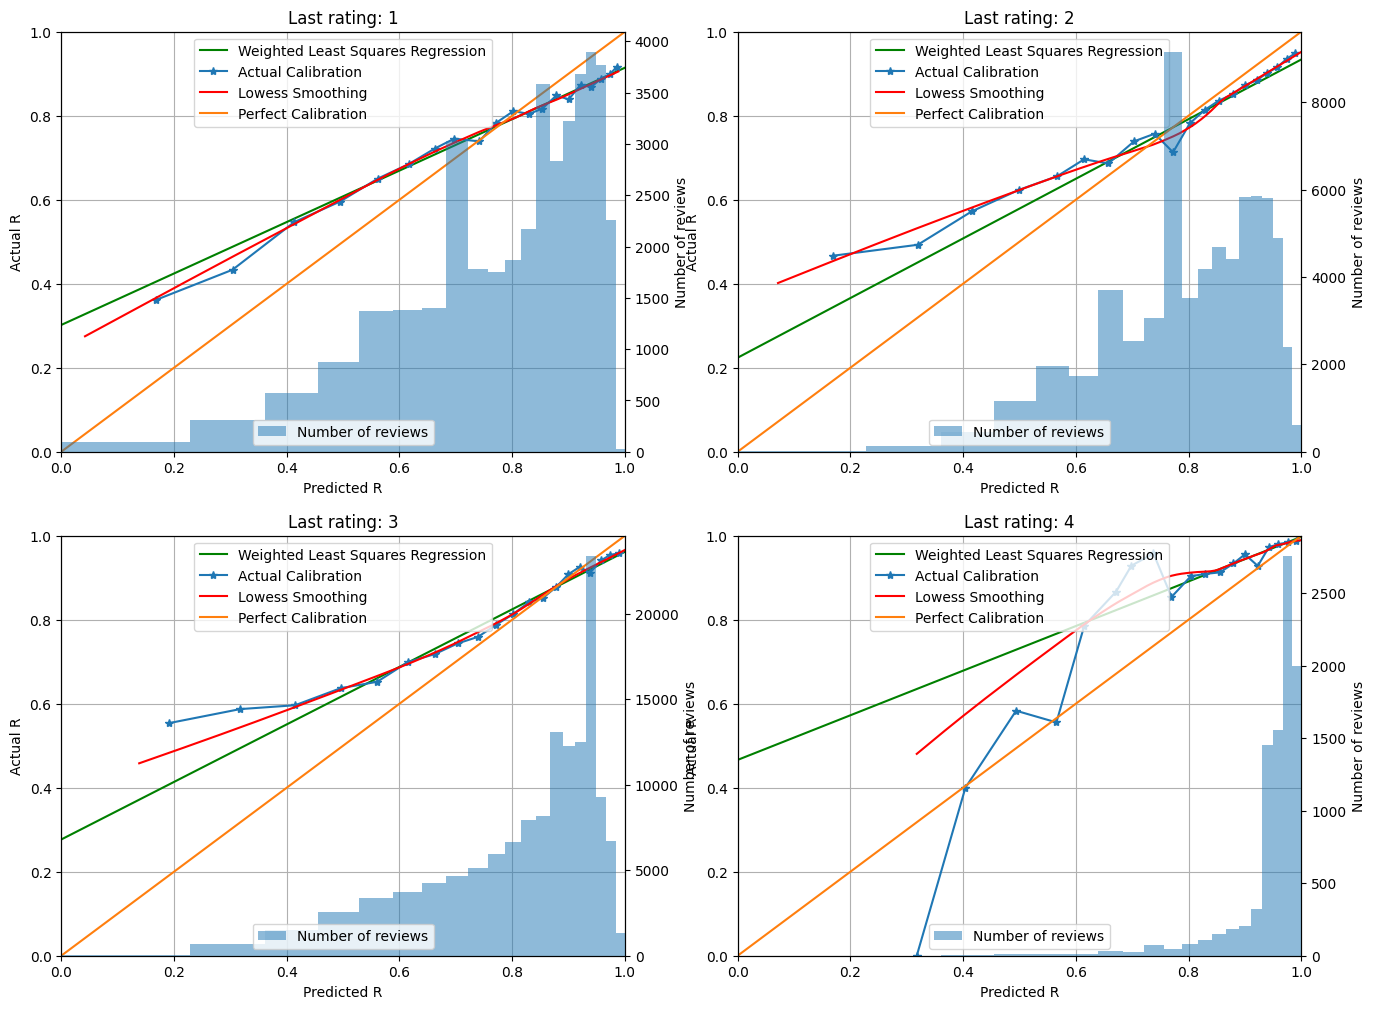

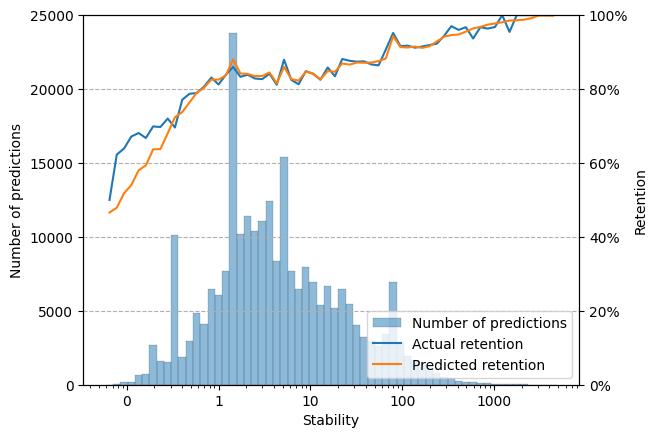

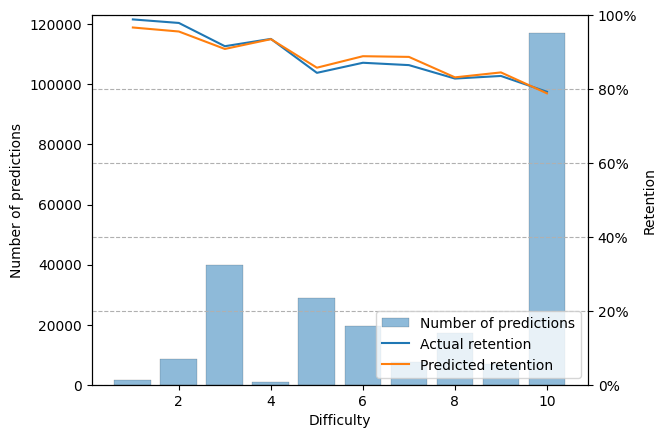

In [6]:
loss_before, loss_after = optimizer.evaluate()
print(f"Loss before training: {loss_before:.4f}")
print(f"Loss after training: {loss_after:.4f}")
metrics, figures = optimizer.calibration_graph()